# Лабораторная работа №5

## Ширяева Ольга, 4 курс, 3 группа

 Порядково-статистические фильтры

Реализовать порядково-статистический фильтр и проиллюстрировать результаты его применения для бинарных и полутоновых изображений и квадратных окон размера 3x3, 5x5, 7x7.

In [55]:
from __future__ import division

import skimage
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [67]:
def filter(image, filter_size):
   
    w = image.shape[0]
    h = image.shape[1]
   
    scaled = np.zeros(shape=(w + 2 * filter_size - 2, h + 2 * filter_size - 2))
    
    for i in range(w):
        for j in range(h):
            scaled[i + filter_size - 1][j + filter_size - 1] = image[i][j]
    
    result = np.zeros(shape=(w + filter_size - 1, h + filter_size - 1))
    f = filter_size // 2
    
    for i in range(f, w + f - 1):
        for j in range(f, h + f - 1):
            s = []
            s = sorted(scaled[i - f: i + f + 1, j - f : j + f + 1].flatten(), reverse=True)
            result[i - f][j - f] = s[filter_size - 1]
    return result


def plot_results(y, title=''):
    plt.imshow(y, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(title)
    plt.show()

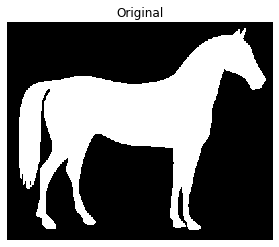

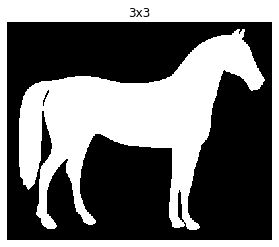

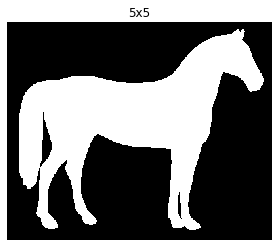

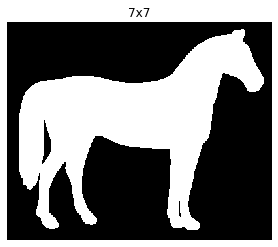

In [68]:
image = np.invert(skimage.data.horse())
plot_results(image, 'Original')

im = filter(image, 3)
plot_results(im, '3x3')

im = filter(image, 5)
plot_results(im, '5x5')

im = filter(image, 7)
plot_results(im, '7x7')

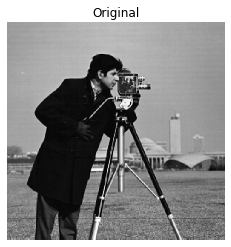

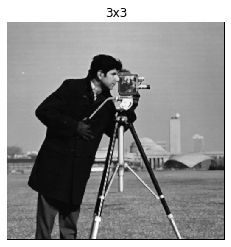

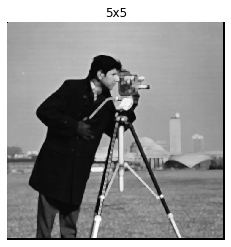

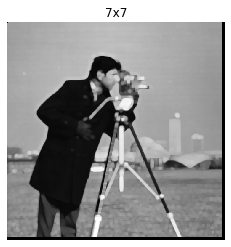

In [69]:
image = skimage.data.camera()
plot_results(image, 'Original')

im = filter(image, 3)
plot_results(im, '3x3')

im = filter(image, 5)
plot_results(im, '5x5')

im = filter(image, 7)
plot_results(im, '7x7')